<a href="https://colab.research.google.com/github/sharavana07/ACE_Hack/blob/main/EXP_5(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Confusion Matrix:
 [[17  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



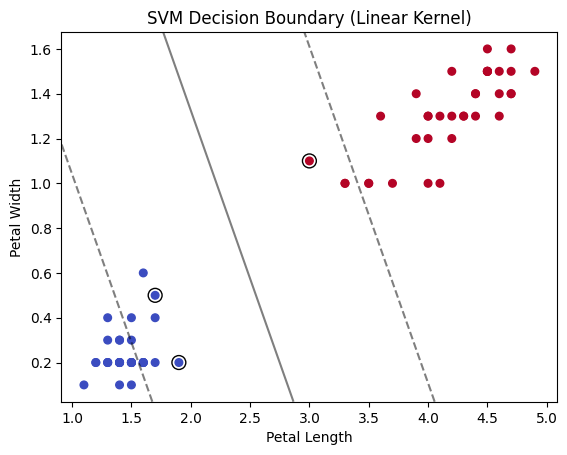

In [5]:
# ==============================
# EXP 5(b): Implement SVM for Classification (Linear Kernel)
# ==============================

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the Iris Dataset
iris = datasets.load_iris()

# We will only take two features for visualization (petal length and petal width)
X = iris.data[:, 2:4]
y = iris.target

# For simplicity, classify only two classes: class 0 (Setosa) and class 1 (Versicolor)
# Remove class 2 (Virginica)
X = X[y != 2]
y = y[y != 2]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the SVM classifier (Linear Kernel)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualization - Decision Boundary
def plot_svm_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1.4, 0, 1.4],
               alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.show()

plot_svm_boundary(X_train, y_train, svm)
